<a href="https://colab.research.google.com/github/aliyatih/MiuulBank-Merkezi-Operasyon-Sistemi/blob/main/Video_Games_Sales_Analysis_Fatih_Ak%C3%A7ay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Adjustment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Required Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/vgsales.csv')
display(df.head())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)
pd.set_option("display.max_colwidth", None)

# Data Cleaning

In [ ]:

df.info()
df.isnull().sum()
df.describe(include='all')

def clean_sales(x):
    if isinstance(x, str):
        parts = x.split('.')
        # Sona yakın sayı kısmını al
        try:
            return float(parts[-1])
        except:
            return np.nan
    return x

sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

for col in sales_cols:
    df[col] = df[col].apply(clean_sales)

    df['Year'] = df['Year'].fillna(df['Year'].median())
    df['Publisher'] = df['Publisher'].fillna("Unknown")
    df['Platform'] = df['Platform'].fillna("Unknown")
    df['Genre'] = df['Genre'].fillna("Unknown")

sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for col in sales_cols:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-nul

# EDA (Exploratory Data Analysis) & Visualization


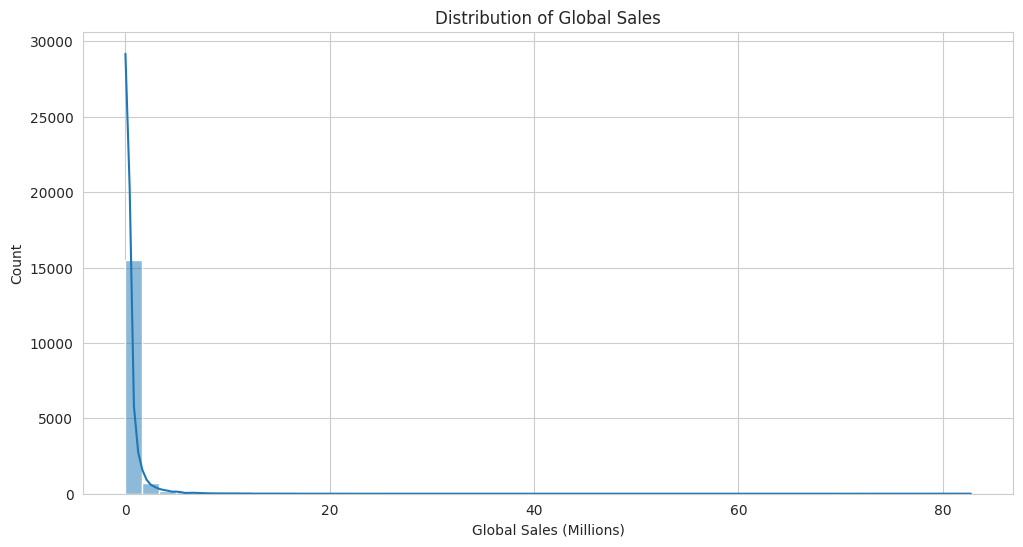

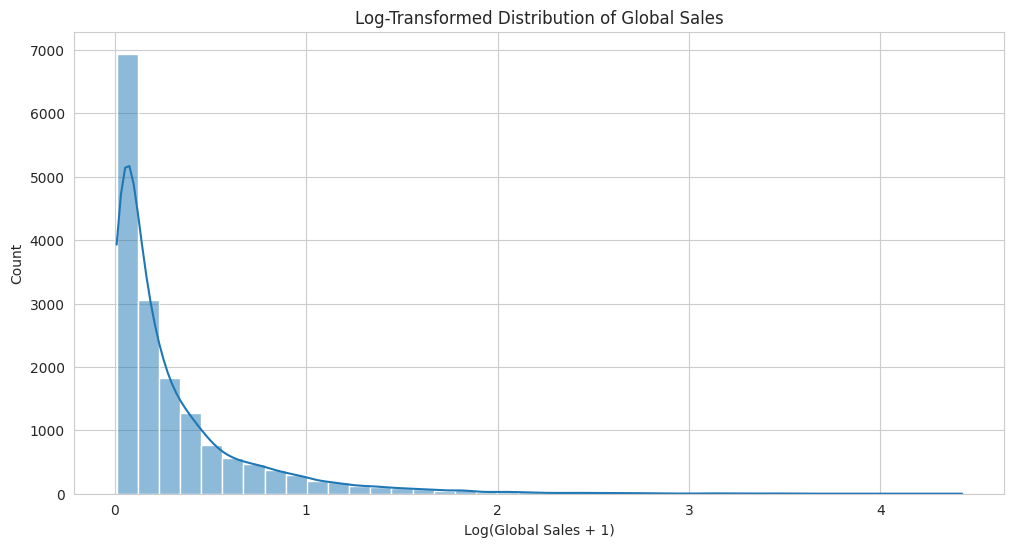

In [ ]:
# Global Sales Dağılımı ile başlayalım

# Global satışların dağılımını görselleştirelim
plt.figure(figsize=(12,6))  # Grafik boyutu
sns.histplot(df['Global_Sales'], bins=50, kde=True)  # Histogram ve yoğunluk eğrisi
plt.title('Distribution of Global Sales')  # Başlık
plt.xlabel('Global Sales (Millions)')  # X ekseni etiketi
plt.ylabel('Count')  # Y ekseni etiketi
plt.show()  # Grafiği ekranda göster

#------------------------------------------------------------------

plt.figure(figsize=(12,6))
# Log transform ile global sales dağılımı
sns.histplot(np.log1p(df['Global_Sales']), bins=40, kde=True)
plt.title('Log-Transformed Distribution of Global Sales')
plt.xlabel('Log(Global Sales + 1)')
plt.ylabel('Count')
plt.show()

# İnceleme sonucu çoğu oyun düşük satış yaparken, birkaç oyun çok yüksek satış gerçekleştirmiş.
#Ayrıca verinin sağa çarpık olduğunu görüyoruz. Log transform ile dağılım daha okunaklı hale geliyor.


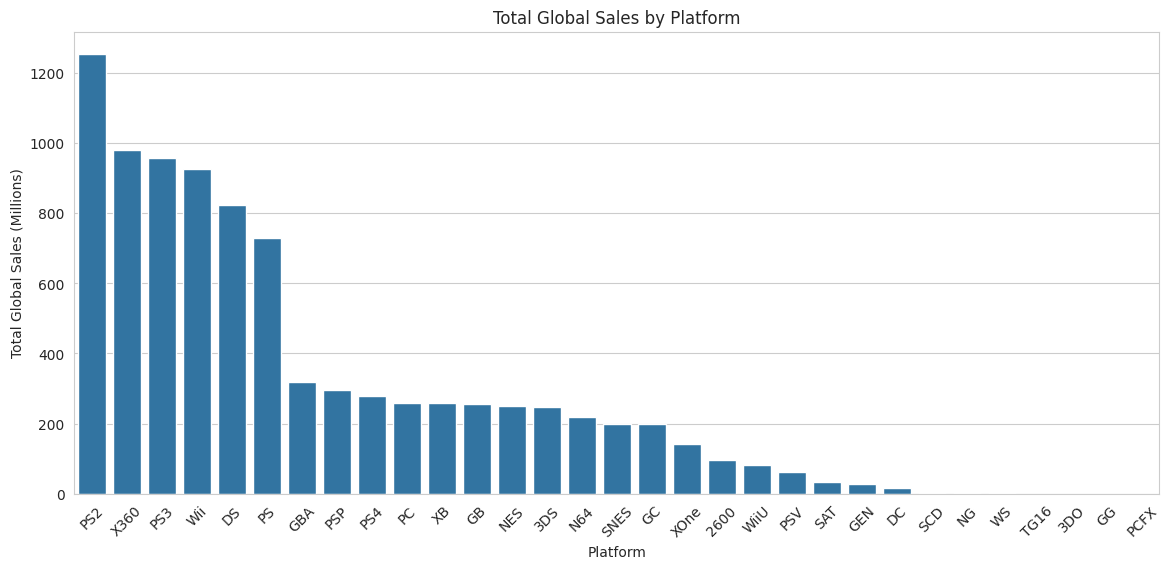

In [ ]:
# --- Platform Bazlı Toplam ve Ortalama Global Satış ---
plt.figure(figsize=(14,6))  # Grafik boyutu
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)  # Platform başına toplam satış
sns.barplot(x=platform_sales.index, y=platform_sales.values)  # Barplot ile görselleştir
plt.title('Total Global Sales by Platform')  # Başlık
plt.xlabel('Platform')  # X ekseni
plt.ylabel('Total Global Sales (Millions)')  # Y ekseni
plt.xticks(rotation=45)  # Platform isimlerini eğik yaz
plt.show()

# Bu incelemede hangi platformların daha çok satış yaptığını görebiliriz.
# Ayrıca en çok satan platformları hızlıca tespit etdebiliriz.
#Wii ve PS2 platformları diğer platformlara göre en yüksek satışa sahip.
#Bu platformlar tarihsel olarak oyun satışlarında dominant olmuş.


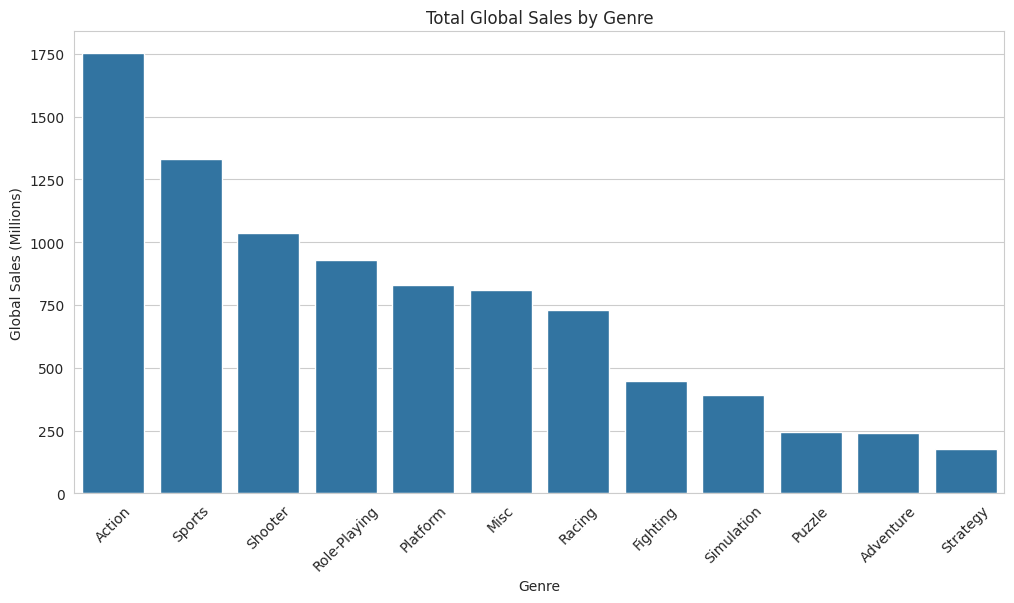

In [ ]:
# --- Genre Bazlı Toplam Global Satış ---
plt.figure(figsize=(12,6))
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)  # Genre başına toplam satış
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

# Bu incelemede hangi tür oyunların daha çok satış yağtığını görebiliriz.
# Ayrıca genel oranları da saptayabiliriz.
#Action ve Sports türleri en çok satmış, diğer türler daha düşük satışa sahip.
#Oyun türü satışları global trendlere göre farklılık gösteriyor.

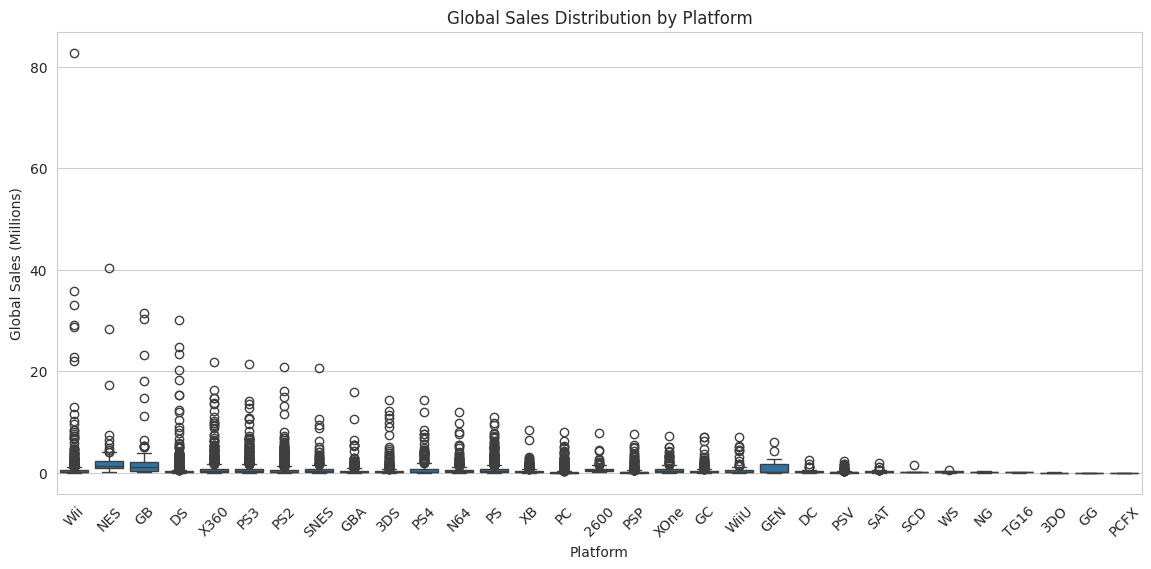

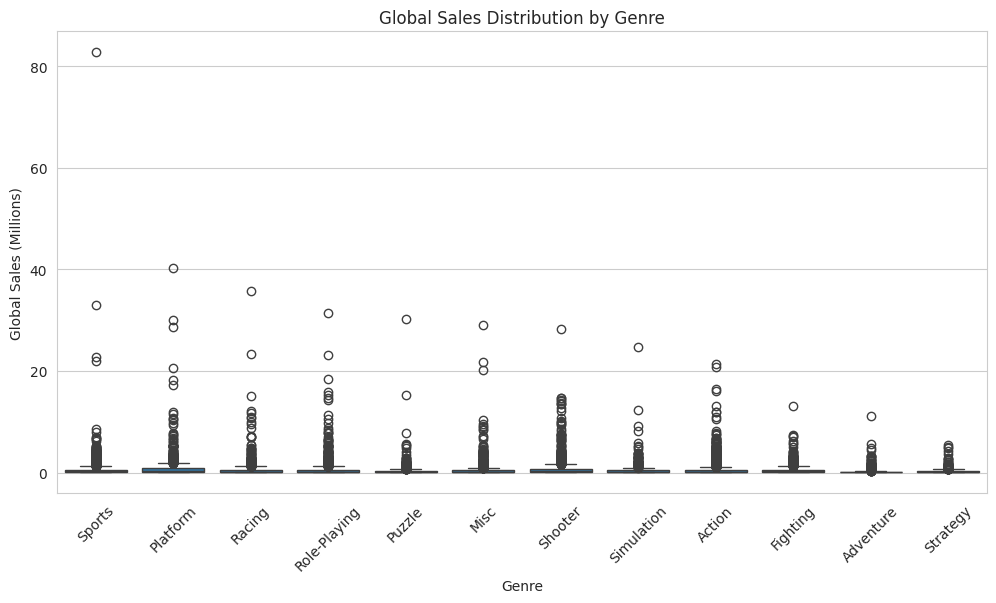

In [ ]:
# --- Platform ve Global Sales ---
plt.figure(figsize=(14,6))
sns.boxplot(x='Platform', y='Global_Sales', data=df)
plt.title('Global Sales Distribution by Platform')  # Başlık
plt.xlabel('Platform')  # X ekseni
plt.ylabel('Global Sales (Millions)')  # Y ekseni
plt.xticks(rotation=45)
plt.show()

# Bu grafikte her platformdaki oyunların satış dağılımını görebiliriz.
# Outlierları kolayca algılayabiliriz.
# Medyan değer ile diğer ortalamaları kıyaslayabiliriz

# --- Genre ve Global Sales ---
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Global Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

# Bu incelemeden sonra hangi tür oyunların daha çok sattığını;
# Hnagi türlerde uç satış değelerinin olduğunu görebiliriz.
# Genel inceleme sonucunda
# Action oyunları PS2 ve Wii’de yüksek satışlar yaparken, bazı platformlarda niche türler popüler.
# Hem platform hem tür kombinasyonu, satış başarısını etkiliyor.

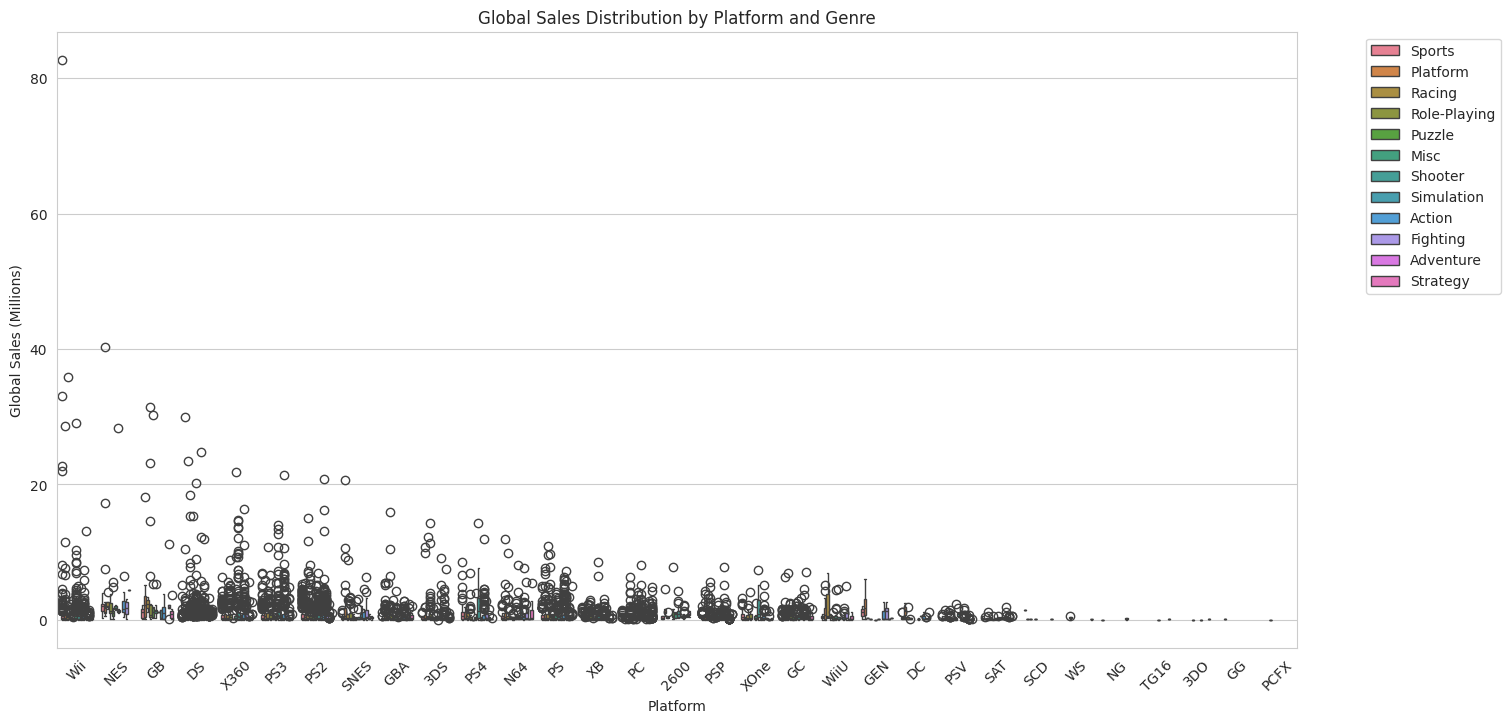

In [ ]:
# --- Platform ve Genre kombinasyonunda Global Sales ---
plt.figure(figsize=(16,8))
sns.boxplot(x='Platform', y='Global_Sales', hue='Genre', data=df)
plt.title('Global Sales Distribution by Platform and Genre')  # Başlık
plt.xlabel('Platform')  # X ekseni
plt.ylabel('Global Sales (Millions)')  # Y ekseni
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend'i sağa alıyoruz
plt.show()

# Bu grafikte hangi platformlarda hang türlerin en popüler ve en çok ürün sattığını görebiliriz.


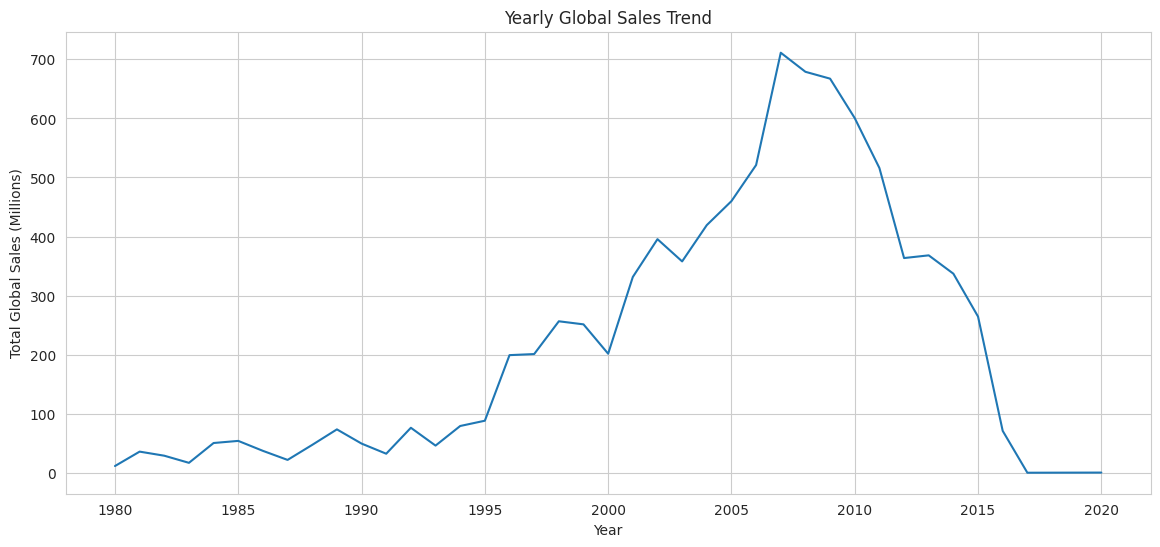

In [ ]:
# --- Yıllara Göre Global Sales Trend ---
plt.figure(figsize=(14,6))
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Global Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.show()

# Bu grafikte yıllara göre global satış değerlerini çizgi grafiğinde görebiliriz.

/tmp/ipython-input-815912397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Global_Sales', data=yearly_sales, palette=palette)


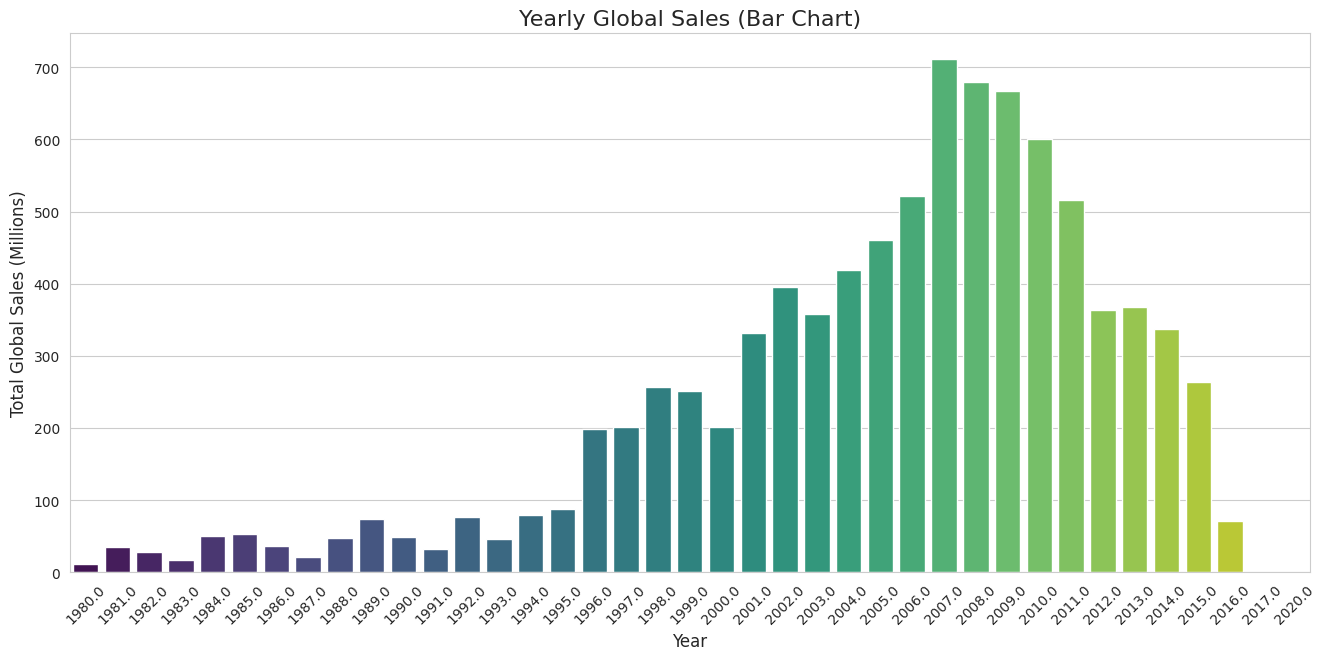

In [ ]:
#  Yıllara göre global satışların hesaplaması(Trend analizi) / Bar Chart
yearly_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()  # reset_index() ile DataFrame yapıyoruz

# Bar chart
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
palette = sns.color_palette("viridis", len(yearly_sales))  # Yıllara göre renk

sns.barplot(x='Year', y='Global_Sales', data=yearly_sales, palette=palette)
plt.title('Yearly Global Sales (Bar Chart)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Global Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Bu grafikte basitçe görüldüğü üzere hangi yıllarda satış patlaması olduğu belirtilmekte.


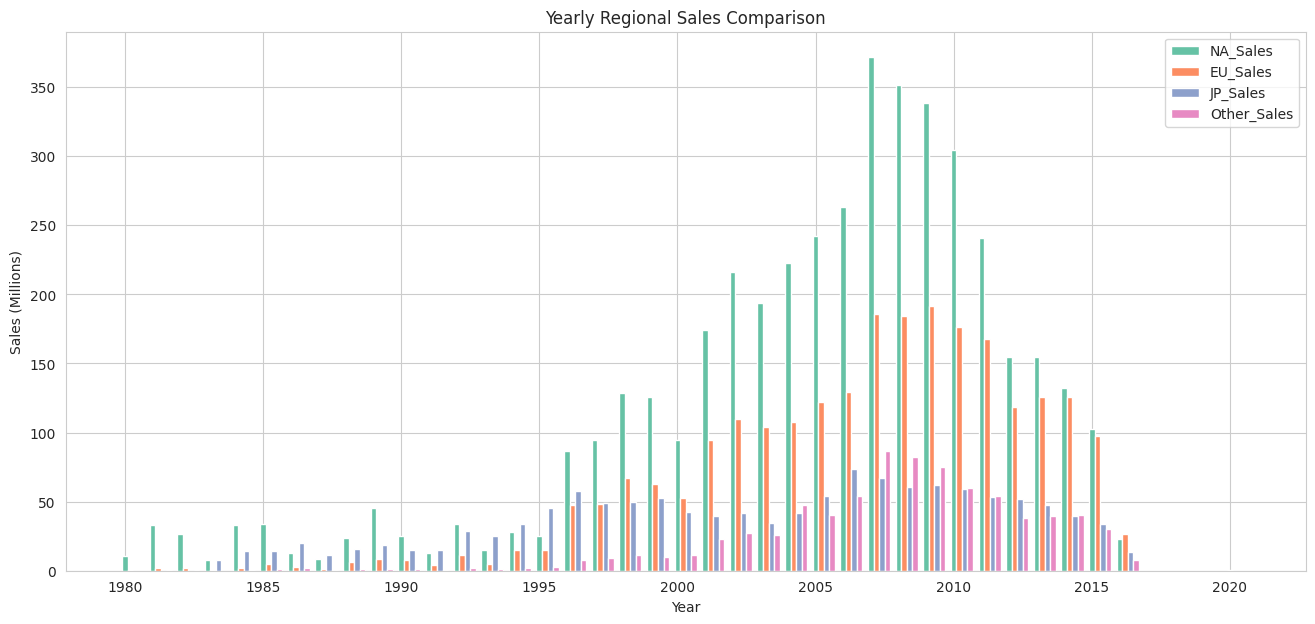

In [ ]:
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
palette = sns.color_palette("Set2", 4)  # 4 bölge için renk

region_sales = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

for i, col in enumerate(region_sales.columns[1:]):  # Year hariç
    plt.bar(region_sales['Year'] + i*0.2, region_sales[col], width=0.2, label=col, color=palette[i])

plt.title('Yearly Regional Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.show()

# Bu incelemede ise hangi bölgenin satışlara ağırlık kattığını, zaman içindeki trendleri görebiliriz.


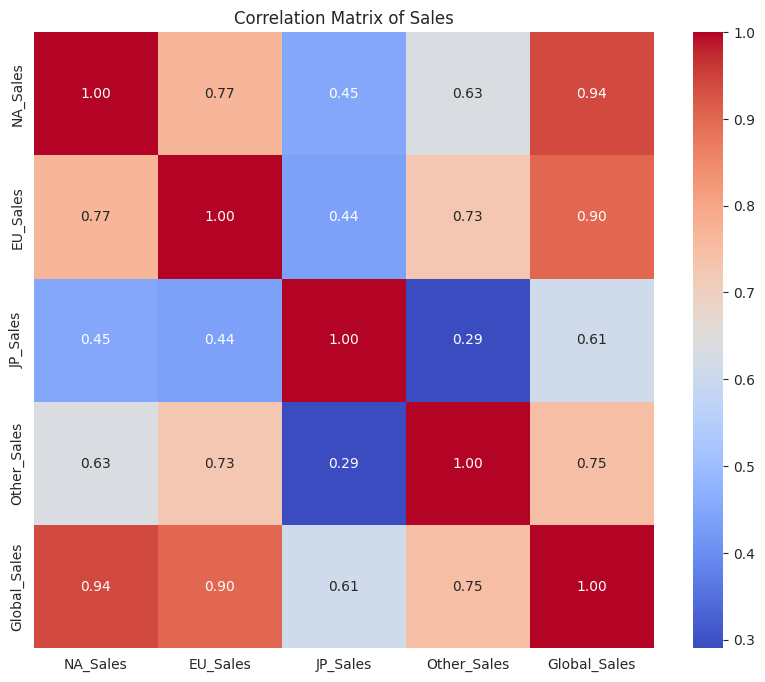

In [ ]:
plt.figure(figsize=(10,8))
corr = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales')
plt.show()

# Bu incelemede bölgesel satışların birbirine ne kadar bağlı olduğunu görebiliriz.


<Figure size 1600x800 with 0 Axes>

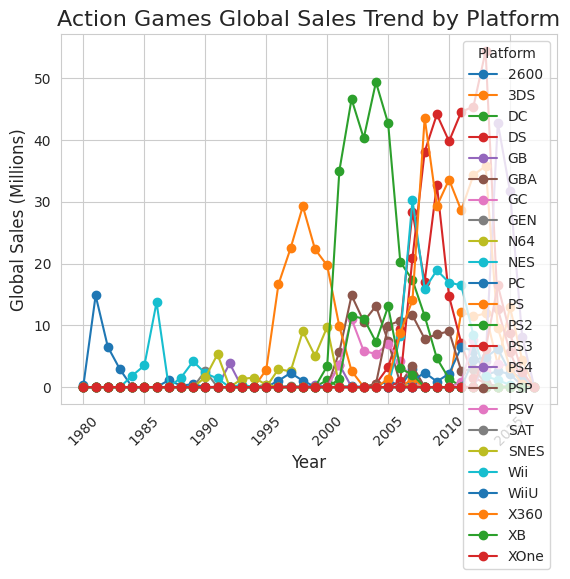

In [ ]:
# ZAMAN SERİSİ ANALİZİ

# --- Platform + Genre Bazlı Zaman Serisi Analizi ---
# Örnek: 2000 sonrası Action oyunlarının satış trendi
action_sales = df[df['Genre']=='Action'].groupby(['Year','Platform'])['Global_Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(16,8))
action_sales.plot(kind='line', marker='o')
plt.title('Action Games Global Sales Trend by Platform', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

# Bu analizde yıllara göre trendi, bölgesel karşılaştırma ile platform ve genre bazlı trendleri görebiliriz.
# 2000’lerin başında Wii ve PS2 döneminde satış patlamaları görülüyor; NA ve EU bölgeleri global satışa en çok katkıyı yapıyor.
# Zaman içinde trendleri ve bölgesel satış dağılımlarını analiz edebiliyoruz.